---
<div class="alert alert-success" data-title="">
  <h2><i class="fa fa-tasks" aria-hidden="true"></i> 사이킷런을 사용한 Boston 집값 예측
  </h2>
</div>

<img src = "https://cdn10.bostonmagazine.com/wp-content/uploads/sites/2/2018/05/boston-rent.jpg" width = "700" >


이번 실습 시간에 다뤄볼 데이터는 보스턴 시의 주택 가격과 관련된 데이터입니다.

- 주택 가격에 영향을 끼치는 여러 요소들 (X, Features)
- 주택 가격 (Y, Target)


## 변수설명 

1) Target (Y) data
* Target: 1978년 보스턴 주택 가격

2) Feature (X) data
* CRIM: 범죄율
* INDUS: 비소매상업지역 면적 비율
* NOX: 일산화질소 농도
* RM: 주택당 방 개수
* LSTAT: 인구 중 하위 계층 비율
* B: 인구 중 흑인 비율
* PTRATIO: 학생/교사 비율
* ZN: 25,000 평방피트를 초과하는 거주지역 비율
* CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0
* AGE: 1940년 이전에 건축된 주택의 비율
* RAD: 방사형 고속도로까지의 거리
* DIS: 직업센터의 거리
* TAX: 재산세율

---

## 데이터 살펴보기 (EDA)

### 데이터 불러오기

In [1]:
from sklearn.datasets import load_boston
boston = load_boston()

In [2]:
import pandas as pd
boston_df = pd.DataFrame(boston.data, 
                         columns=boston.feature_names, 
                         index=range(1,len(boston.data)+1))
boston_df['PRICE'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
1,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 각각의 독립변수와 종속변수 사이의 관계를 살펴본다. 

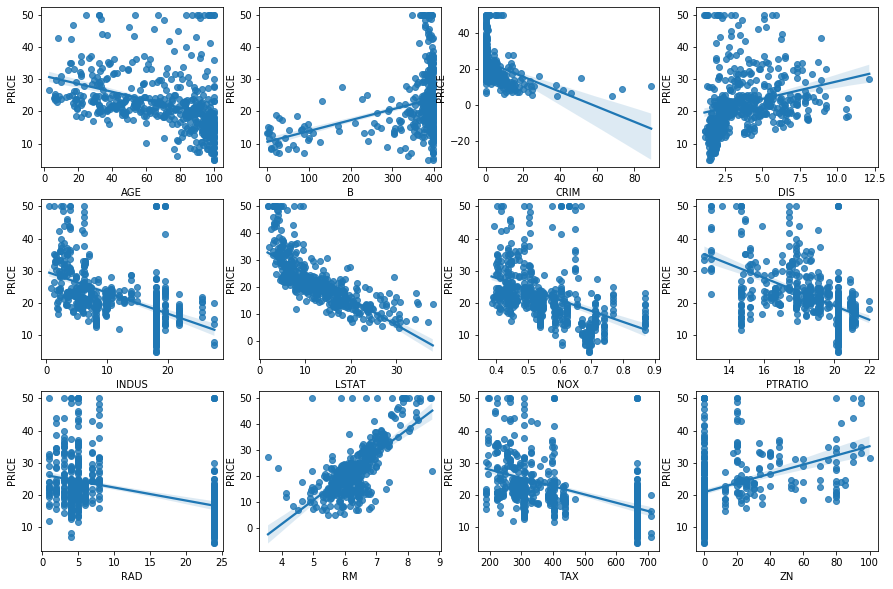

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 3행 4여의 subplot을 준비
fig,axs = plt.subplots(figsize=(15,10),nrows=3,ncols=4)

# 전체 컬럼들에서 종속변수 및 불필요한 컬럼을 뺀다
# 처음부터 마지막 전까지
features = [f for f in list(boston_df.columns)[:-1] if f != "CHAS"]
features.sort()

for i, feature in enumerate(features):
    # 현재 subplot의 행/열 번호를 갱신
    r = int(i/4)
    c = i%4
    # 산점도와 회귀선을 그린다.
    sns.regplot(x=feature,y="PRICE",data=boston_df,ax=axs[r][c])

### 히트맵으로 상관관계 나타내기

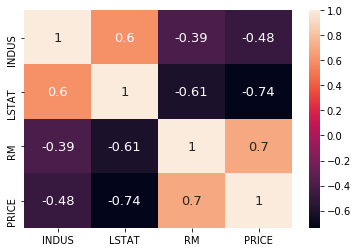

In [5]:
# 변수들 간의 상관 계수를 구한다
ccol = ["INDUS","LSTAT","RM","PRICE"]
corrs = boston_df[ccol].corr()

# 상관 계수 값에 대한 히트맵을 그린다
# 매개변수 annot은 맵상에 값을 표시할 것인지의 여부를 지정한다
# 매개변수 annot_kws는 표시되는 값에 대한 추가 옵션이다.
sns.heatmap(corrs,annot=True,annot_kws={'size':13})

<div class="alert alert-success" data-title="">
  <h2><i class="fa fa-tasks" aria-hidden="true"></i> 실제 데이터로 다중선형회귀 해보기
  </h2>
</div>

In [6]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
1,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [14]:
# 데이터 프레임에서 독립변수와 종속변수를 다시 구분
X = boston_df.drop(["PRICE"],axis=1) # 1이면 열을 뺀다 # 독립변수 13개 넣은 것


In [15]:
y = boston_df["PRICE"]

## 학습 평가 데이터 나누기 


```python 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
        train_test_split(X,y , test_size, train_size, random_state, shuffle, stratify)
```

- X, y : 분할시킬 데이터
- test_size : 테스트 데이터셋의 비율(float)이나 갯수(int) (default = 0.25)
- train_size : 학습 데이터셋의 비율(float)이나 갯수(int) (default = test_size의 나머지)
- shuffle : 셔플여부설정 (default = True)
- stratify : 지정한 Data의 비율을 유지 ex) Label Set인 Y가 25%의 0과 75%의 1로 이루어진 Binary -Set일 때, stratify=Y로 설정하면 나누어진 데이터셋들도 0과 1을 각각 25%, 75%로 유지한 채 분할된다.




### random_state 에 대하여

- random_state : 데이터 분할시 셔플이 이루어지는데 이를 기억하기 위한 임의의 시드값 (int나 RandomState로 입력)
> 컴퓨터에서 random한 결과를 낼 시, 'Seed'라 부르는 특정한 시작으로 숫자를 지정합니다. 즉, 컴퓨터에서 random은 실제로 random이 아닙니다.

`random_sate`은 **학습데이터 평가데이터 분리할 때** 사용되며, 데이터셋을 무작위로 섞어서 분리하기 때문에 **시드값**이 필요합니다.

Ex) `random_state` = 1이라고 정의하는 경우, 시드값을 1로하는 무작위로 복원 추출된 데이터의 학습 결과와 그에 따라 결정된 변수들을 담아둡니다.

In [16]:
# 학습용 및 검증용 데이터로 분리한다
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                       y,
                                                       test_size=0.3,
                                                       random_state = 42)

In [17]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X_train,y_train) #  학습!!
y_pred = model.predict(X_test)

## 평가 

### 평가지표 
- MAE(Mean Absolute Error): 실제 값과 예측값의 차이를 절대값으로 변환해 평균한 것.
- MSE(Mean Squared Error): 실제 값과 예측값의 차이를 제곱해 평균한 것.
- RMSE(Root Mean Squared Error): MSE에 루트를 씌워 값이 지나치게 커지는 것을 하고, 단위를 맞춰주는 것을 목표로 함.
- 이외에도.. MSLE, RMSLE 등의 평가지표가 많습니다.

In [18]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,y_pred)
mse

21.517444231177638

In [19]:
r2 = r2_score(y_test,y_pred)
r2

0.7112260057484874

In [20]:
from sklearn.metrics import mean_squared_error, r2_score    # 사이킷런에 있는 평가 지표 함수들

# MSE 방식으로 평가
mse = mean_squared_error(y_test, y_pred)
# RSME 방식으로 평가2
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
# R^2의 분산 지표를 통해, 모델의 예측 정확도 평가
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_pred)))

MSE : 21.517 , RMSE : 4.639
Variance score : 0.711


In [21]:
boston_df.shape

(506, 14)

## CV 사용하기 
![](https://1.bp.blogspot.com/-0xXCMk0QIQE/XoF9dLJqYxI/AAAAAAAAAOc/z_mbr5ZFEmgKeuIH2cspOjUjymrB-A-IQCLcBGAsYHQ/s1600/%25E1%2584%258F%25E1%2585%25A2%25E1%2586%25B8%25E1%2584%258E%25E1%2585%25A53%255D.JPG)

In [22]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits = 10) # 교차검증 방법 설정 

from sklearn.model_selection import cross_val_score
# cross_val_score(모델, X , y , 사용할 교차검증 방법)
cross_val_score(model, X, y, cv=kfold)

array([ 0.73376082,  0.4730725 , -1.00631454,  0.64113984,  0.54766046,
        0.73640292,  0.37828386, -0.12922703, -0.76843243,  0.4189435 ])

In [23]:
result = cross_val_score(model, X, y, cv=kfold).mean()
print('CV 결과값:', result)

CV 결과값: 0.20252899006055797
